- Importing all relevant libraries for Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Importing file into a readable state

In [2]:
file_path = r"C:\Users\Ralph-cmjsols\Downloads\ML Test\used_cars_data-1.csv"

df = pd.read_csv(file_path)

### EDA

In [3]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


In [5]:
df_copy = df.copy(deep = True)

In [6]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

In [7]:
df.drop(['S.No.', 'New_Price'], axis =1, inplace = True)

In [8]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [9]:
nu_mileage = []
for i in df['Mileage']:
    if 'km/kg' in str(i):
        i = float(i[:-6])
        i = i * 0.77
        nu_mileage.append(i)
    elif 'kmpl' in str(i):
        i = float(i[:-5])
        nu_mileage.append(i)
    else:
        nu_mileage.append(i)

In [10]:
# Correct_Mileage= []
# for i in df.Mileage:
#     if str(i).endswith('km/kg'):
#         i = i[:-6]
#         i = float(i)*1.40
#         Correct_Mileage.append(float(i))
#     elif str(i).endswith('kmpl'):
#         i = i[:-6]
#         #print(i)
#         Correct_Mileage.append(float(i))

In [11]:
df['Mileage'] = nu_mileage

In [12]:
engine_size = []
for e in df['Engine']:
    if str(e).endswith('CC'):
        e = float(e[:-3])
        engine_size.append(e)
    else:
        engine_size.append(e)

In [13]:
df['Engine'] = engine_size

In [14]:
eng_power = []
for ep in df['Power']:
    if str(ep).endswith('bhp'):
        ep = float(ep[:-4])
        eng_power.append(ep)
    else:
        eng_power.append(ep)

In [15]:
df['Power'] = eng_power

In [16]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,20.482,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.0,140.80,5.0,17.74


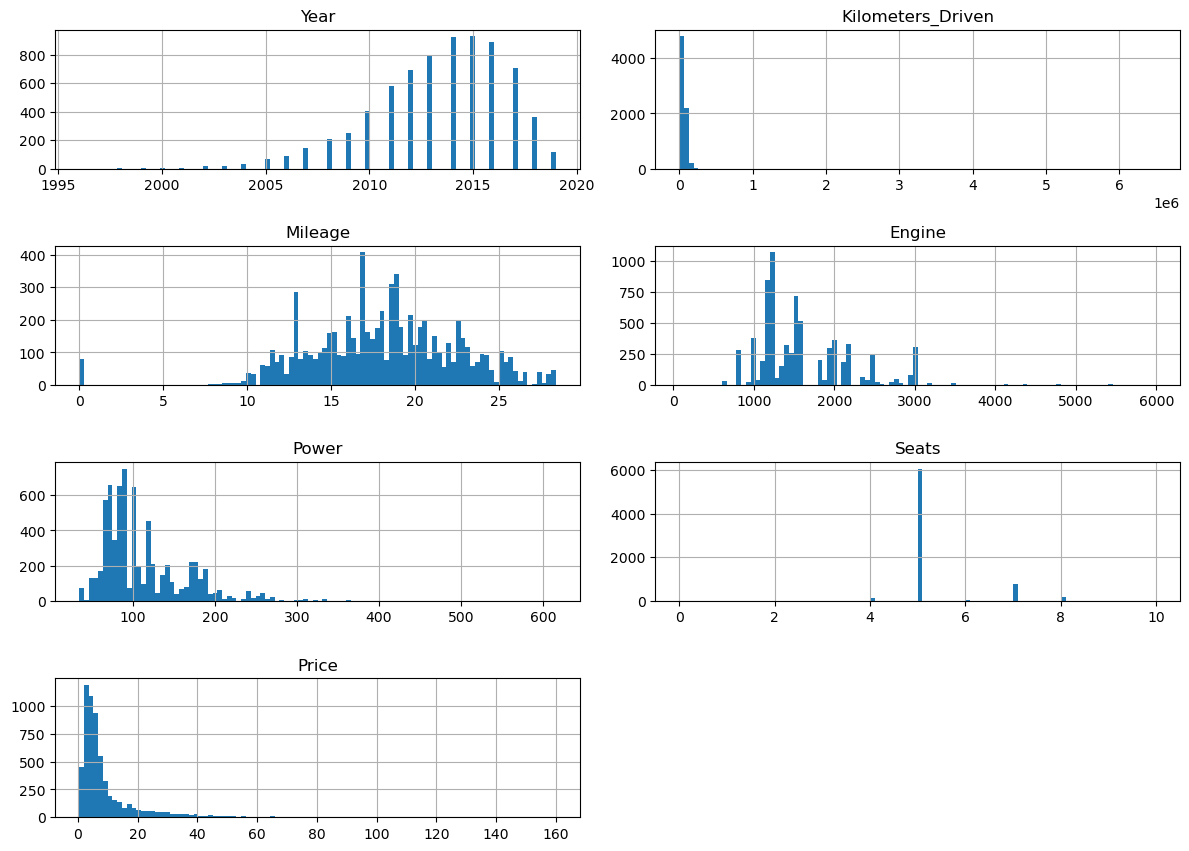

In [17]:
df.hist(stacked = False, bins = 100, figsize = (12,30), layout = (14,2))
plt.tight_layout()

<AxesSubplot:xlabel='Location', ylabel='Price'>

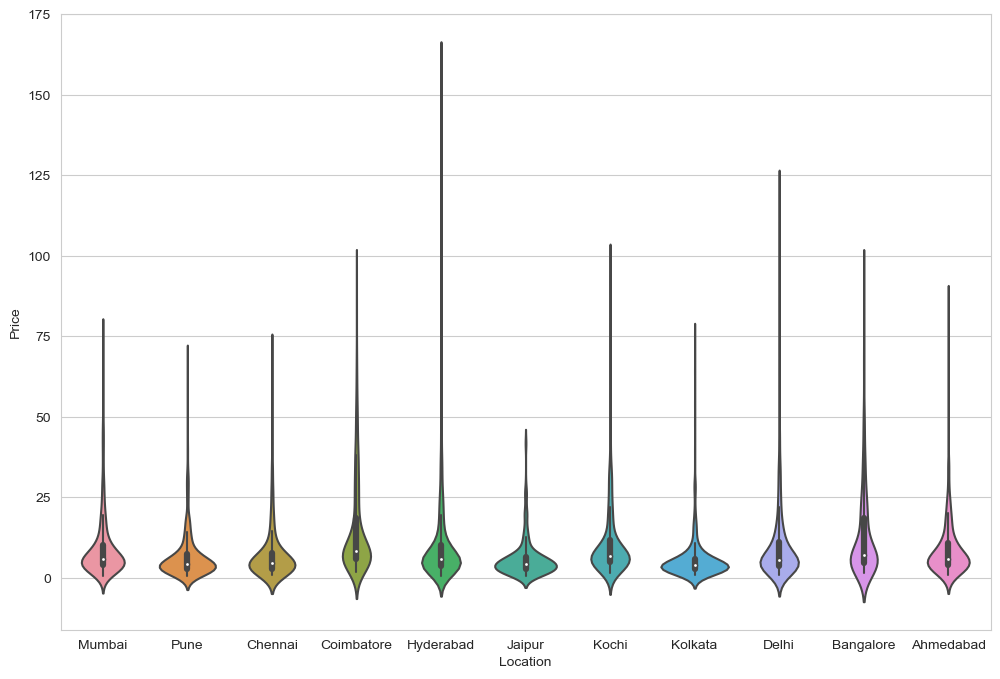

In [18]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
plt.figure(figsize=(12,8)) # Set plot dimensions
sns.violinplot(x='Location', y='Price', data=df)

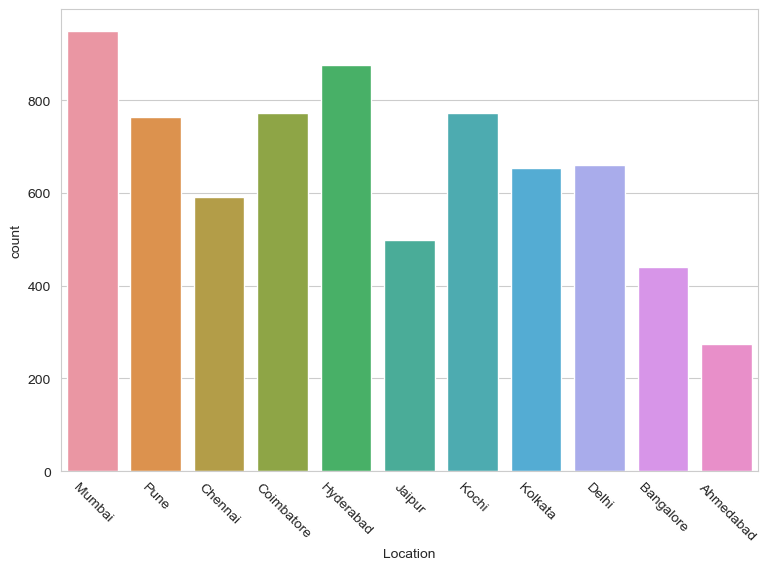

In [19]:
plt.figure(figsize=(9,6))
sns.countplot(x ='Location', data = df)
 
# Rotate x-labels
plt.xticks(rotation=-45)
plt.show()

In [20]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [21]:
df['Name'].value_counts()

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64

In [22]:
df['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [23]:
df[df['Fuel_Type'] == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,12.75


In [24]:
df['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [25]:
df.duplicated().sum()

1

In [26]:
df = df.dropna()
df = df.drop_duplicates()

In [27]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

Text(0.5, 1.0, 'Histogram of Price')

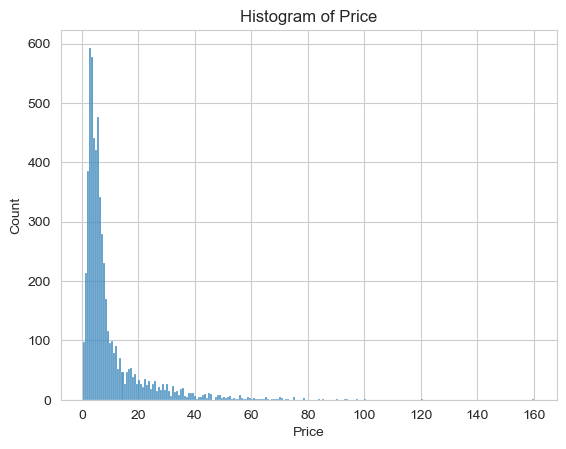

In [28]:
skewness = df['Price'].skew()

fig, ax = plt.subplots()
sns.histplot(data=df, x='Price')
ax.set_title('Histogram of Price')

- Histoplot shows the Output Variable Price is right skewed
- To fix this, the variable Price must be logged.
- Numpy comes with a built in method (np.log)

In [29]:
expo = 1e-06
df['Price'] = df['Price'] + expo

In [30]:
df['Price'] = np.log(df['Price'])

Text(0.5, 1.0, 'Histogram of Price')

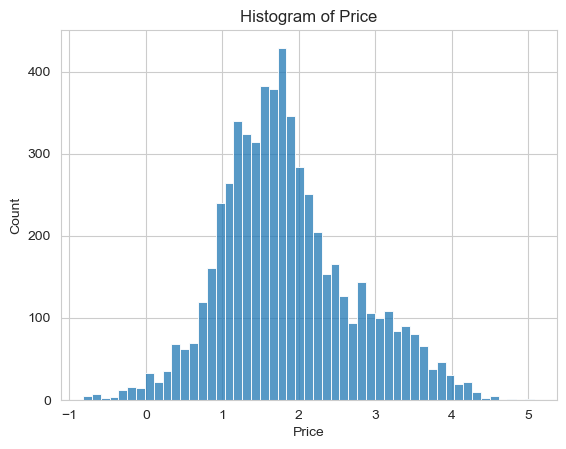

In [31]:
fig, ax = plt.subplots()
sns.histplot(data=df, x='Price')
ax.set_title('Histogram of Price')

- skewedness has been fixed

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5872.0,2013.477691,3.164568,1998.000000,2012.00000,2014.0000,2016.000000,2.019000e+03
Kilometers_Driven,5872.0,58316.999149,92169.410006,171.000000,33422.50000,52609.0000,72402.750000,6.500000e+06
Mileage,5872.0,18.215158,4.294703,0.000000,15.26000,18.2000,21.100000,2.840000e+01
Engine,5872.0,1625.745572,601.641783,624.000000,1198.00000,1495.5000,1991.000000,5.998000e+03
Power,5872.0,113.276894,53.881892,34.200000,75.00000,97.7000,138.100000,5.600000e+02
Seats,5872.0,5.283719,0.805081,2.000000,5.00000,5.0000,5.000000,1.000000e+01
Price,5872.0,1.845541,0.864005,-0.820978,1.25775,1.7492,2.302585,5.075174e+00


- The Mileage of a car can't be zero (0), so this will be treated as a Null value
- Using Sklearn in-built library SimpleImputer(), this issue is fixed

In [33]:
from sklearn.impute import SimpleImputer

simp = SimpleImputer(missing_values = 0, strategy = 'median')

In [34]:
simp = simp.fit(df[['Mileage']])

In [35]:
df['Mileage'] = simp.transform(df[['Mileage']])

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5872.0,2013.477691,3.164568,1998.000000,2012.00000,2014.0000,2016.000000,2.019000e+03
Kilometers_Driven,5872.0,58316.999149,92169.410006,171.000000,33422.50000,52609.0000,72402.750000,6.500000e+06
Mileage,5872.0,18.302301,4.105425,6.400000,15.30000,18.2750,21.100000,2.840000e+01
Engine,5872.0,1625.745572,601.641783,624.000000,1198.00000,1495.5000,1991.000000,5.998000e+03
Power,5872.0,113.276894,53.881892,34.200000,75.00000,97.7000,138.100000,5.600000e+02
Seats,5872.0,5.283719,0.805081,2.000000,5.00000,5.0000,5.000000,1.000000e+01
Price,5872.0,1.845541,0.864005,-0.820978,1.25775,1.7492,2.302585,5.075174e+00


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [38]:
le = LabelEncoder()

df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])

df['Transmission'] = le.fit_transform(df['Transmission'])

df['Owner_Type'] = le.fit_transform(df['Owner_Type'])

<AxesSubplot:>

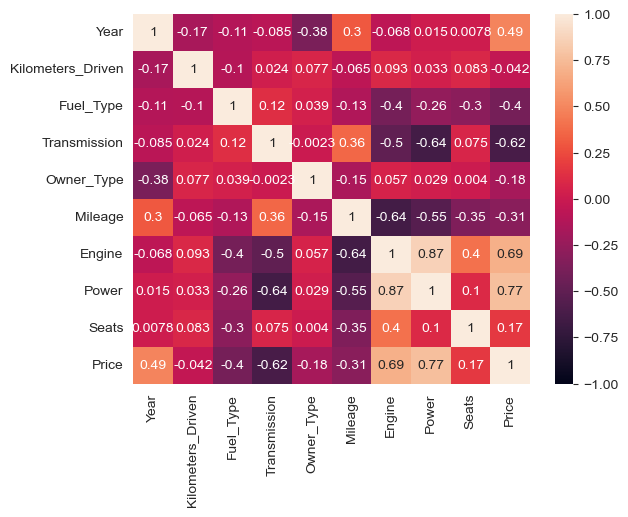

In [39]:
numbers = df.select_dtypes(include = 'number')
correlation = numbers.corr()

sns.heatmap(correlation, vmin = -1, vmax = 1, annot = True)

In [40]:
X = df.drop(['Price','Name'],axis = 1)
y = df['Price']

In [41]:
X = pd.get_dummies(X, drop_first = True)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [43]:
scaler = StandardScaler()
x_trainscale = scaler.fit_transform(x_train)
x_testscale = scaler.transform(x_test)

In [45]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    predict = model.predict(predictors)

    r2 = r2_score(target, predict)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, predict)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, predict))  # to compute RMSE
    mae = mean_absolute_error(target, predict)  # to compute MAE
    mape = mape_score(target, predict)  # to compute MAPE

    # creating a dataframe of metrics
    df_show = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape
        },
        index=[0],
    )

    return df_show

In [52]:
lin_regress = LinearRegression()

lin_regress.fit(x_trainscale, y_train)

LinearRegression()

In [47]:
pip install mlxtend==0.20.0

     ---------------------------------------- 1.3/1.3 MB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [49]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

lin_reg = LinearRegression()

sfs = SFS(
    lin_reg,
    k_features=x_train.shape[1],
    forward=True,
    floating=False,
    scoring="r2",
    verbose=2,
    n_jobs=-1,
    cv=5,
)


sfs = sfs.fit(x_trainscale, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    9.3s finished

[2023-02-06 06:46:27] Features: 1/19 -- score: 0.5856149899252605[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.2s finished

[2023-02-06 06:46:27] Features: 2/19 -- score: 0.8149210966925381[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.1s finished

[2023-02-06 06:46:27] Features: 3/19 -- score: 0.8398492034536116[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished

[2023-02-06 06:46:28] Features: 4/19 -- score: 0.8556655948559886[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent 

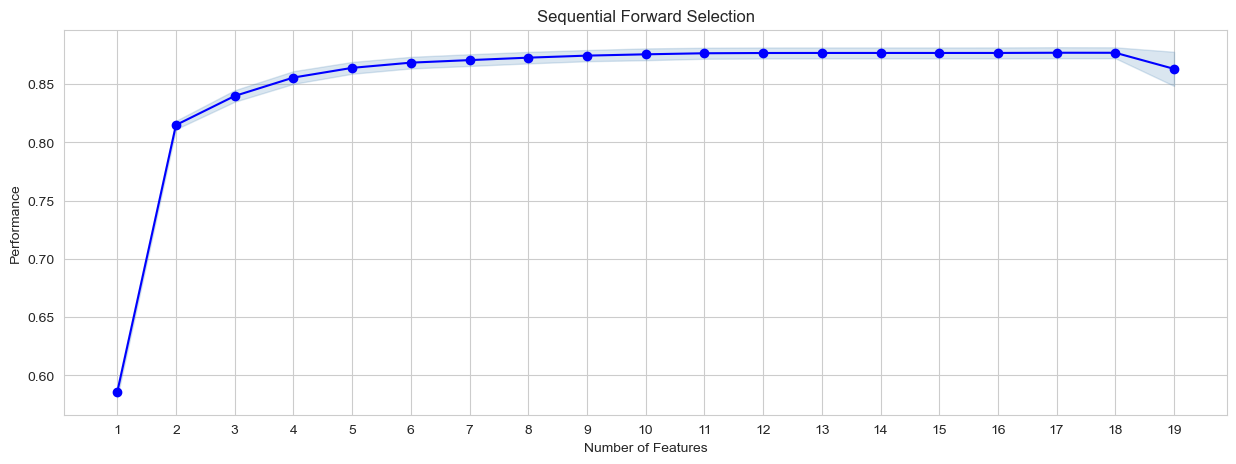

In [51]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection")
plt.show()

In [54]:
print(f'Train Accuracy = {lin_regress.score(x_trainscale, y_train)}')
print(f'Test Accuracy = {lin_regress.score(x_testscale, y_test)}')

Train Accuracy = 0.87881449344749
Test Accuracy = 0.8869770529098499


In [57]:
train_perform_mode = model_performance_regression(lin_regress, x_train, y_train)
train_perform_mode

C:\Users\Ralph-cmjsols\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,901.491483,559.132229,-1.093887e+06,-1.098331e+06,8.318946e+07


In [58]:
test_perform_mode = model_performance_regression(lin_regress, x_testscale, y_test)
test_perform_mode

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.292823,0.222997,0.886977,0.885118,203101.635106


In [59]:
lin_regress.coef_

array([ 0.39287964, -0.0072979 , -0.14397954, -0.14571477, -0.03141733,
       -0.06943179,  0.06638326,  0.42015625,  0.01531537,  0.03237801,
       -0.00472223,  0.0186203 , -0.0215853 ,  0.02624471, -0.02247616,
       -0.01620113, -0.06644806, -0.02699021, -0.02748339])

- For every increase or decrease at a chosen variable, provided all other variables are constant, there's a corresponding increase or decrease

In [60]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

lin_reg = LinearRegression()

sfs = SFS(
    lin_reg,
    k_features=10,
    forward=True,
    floating=False,
    scoring="r2",
    verbose=2,
    n_jobs=-1,
    cv=5,
)


sfs = sfs.fit(x_trainscale, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    9.2s finished

[2023-02-06 07:28:29] Features: 1/10 -- score: 0.5856149899252605[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.1s finished

[2023-02-06 07:28:29] Features: 2/10 -- score: 0.8149210966925381[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  17 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.1s finished

[2023-02-06 07:28:30] Features: 3/10 -- score: 0.8398492034536116[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished

[2023-02-06 07:28:30] Features: 4/10 -- score: 0.8556655948559886[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent 

In [61]:
feat_select = list(sfs.k_feature_idx_)
feat_select

[0, 2, 3, 5, 6, 7, 9, 11, 13, 16]

In [64]:
x_train_feat = x_train[x_train.columns[feat_select]]
x_test_feat = x_test[x_test.columns[feat_select]]

In [65]:
x_train_feat = scaler.fit_transform(x_train_feat)
x_test_feat = scaler.transform(x_test_feat)

In [66]:
lin_regress_feat = LinearRegression()

lin_regress_feat.fit(x_train_feat, y_train)

LinearRegression()

In [68]:
print(f'Train Accuracy = {lin_regress_feat.score(x_train_feat, y_train)}')
print(f'Test Accuracy = {lin_regress_feat.score(x_test_feat, y_test)}')

Train Accuracy = 0.8767952879929405
Test Accuracy = 0.8857316887553353


In [73]:
train_perform_mode_feat = model_performance_regression(lin_regress_feat, x_train_feat, y_train)
train_perform_mode_feat

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.302544,0.224258,0.876795,0.876532,97623.837023


In [70]:
test_perform_mode_feat = model_performance_regression(lin_regress_feat, x_test_feat, y_test)
test_perform_mode_feat

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.292823,0.222997,0.886977,0.885118,203101.635106
